In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pydataset as pds
import seaborn as sns
from env import get_db_url

# Exercises Part 1

## Use the iris database to answer the following questions:

In [2]:
print(sns.get_dataset_names())

iris = sns.load_dataset('iris')

iris

['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'exercise', 'flights', 'fmri', 'gammas', 'geyser', 'iris', 'mpg', 'penguins', 'planets', 'taxis', 'tips', 'titanic']


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


### 1. What does the distribution of petal lengths look like?

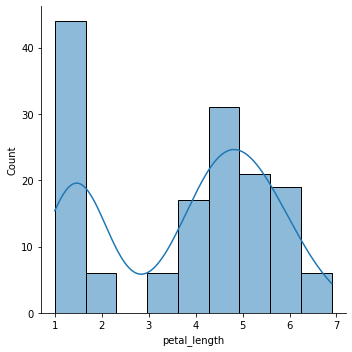

In [3]:
#How do we know which of the chart types is best? For me, it's between these two:

#Don't forget to include the kde here, as that can provide a better visual for distributions.

sns.displot(iris, x = 'petal_length', kde = True)

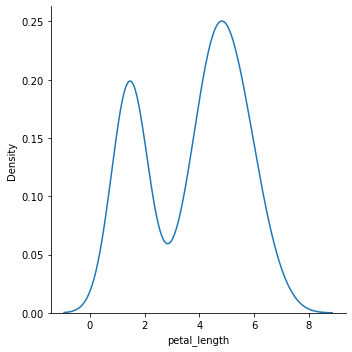

In [4]:
sns.displot(iris, x = 'petal_length', kind = 'kde')

### 2. Is there a correlation between petal length and petal width? Use http://guessthecorrelation.com/ as a hint to how we could visually determine if a correlation exists between two numeric columns.

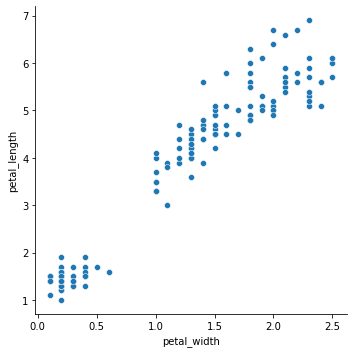

In [5]:
#Ravinder added the 'hue' argument here to show the difference between species, but he mentioned that it's not necessary to see the overall correlation.
sns.relplot(data = iris, x = 'petal_width', y = 'petal_length', kind = 'scatter', 
            #hue = 'species'
           )

#This appears to have a fairly strong positive correlation.

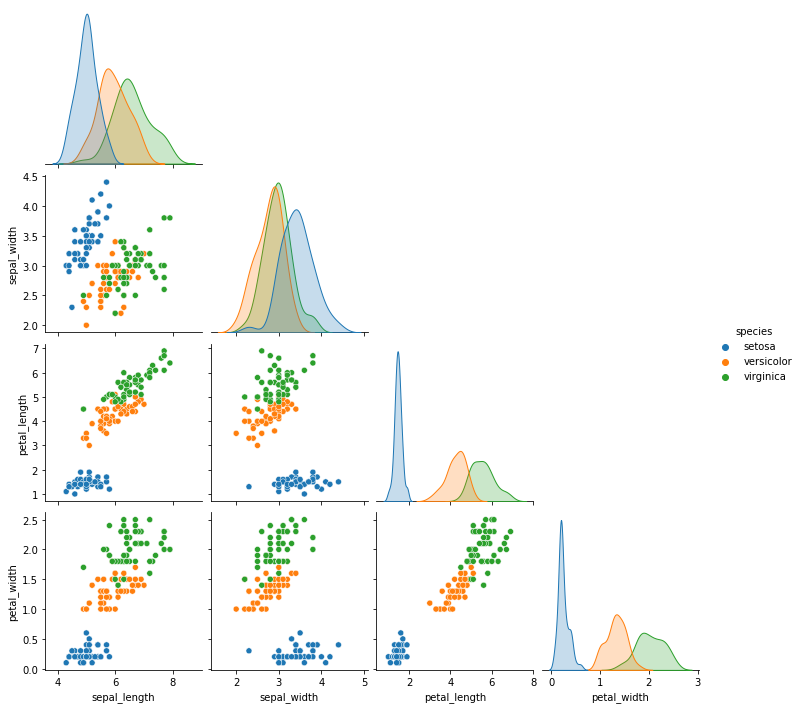

In [6]:
#You can also use a pairplot, which is perfect for this kind of situation:

sns.pairplot(data = iris, hue = 'species', corner = True)

In [7]:
iris['petal_length'].corr(iris['petal_width'])

0.9628654314027962

In [8]:
iris.petal_length.corr(iris.petal_width)

0.9628654314027962

### 3. Would it be reasonable to predict species based on sepal width and sepal length? For this, you'll visualize two numeric columns through the lens of a categorical column.

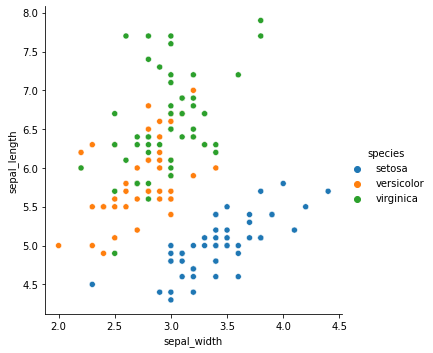

In [9]:
sns.relplot(data = iris, x = 'sepal_width', y = 'sepal_length', hue = 'species', kind = 'scatter', 
            #col = 'species'
           )

#I originally used a line plot, but line plots are generally not ideal for these kinds of things, as scatters are better for categorical data where we're not measuring trends. 

#It seems like these would be decent predictors of species. Setosa would be very easy to distinguish, while versicolor and virginica do have some possible overlap, but are mostly separate.

In [10]:
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


### 4. Which features would be best used to predict species?

<Figure size 720x576 with 0 Axes>

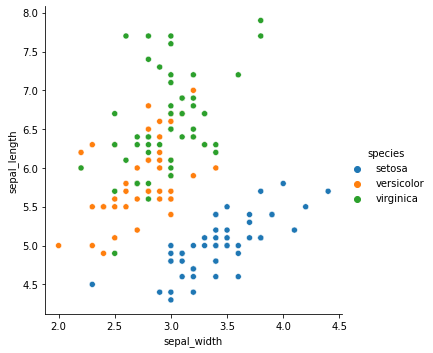

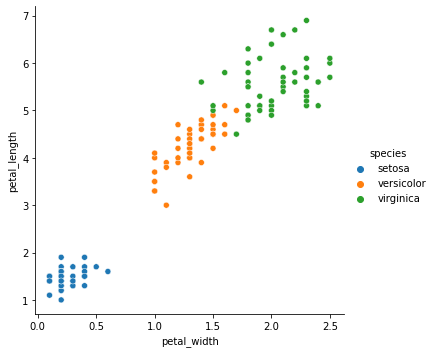

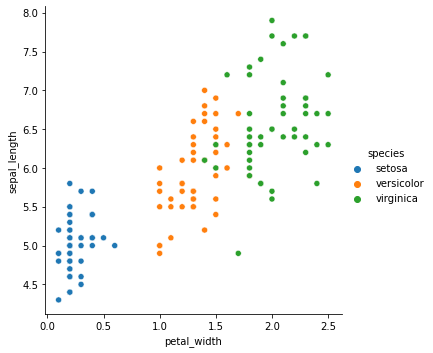

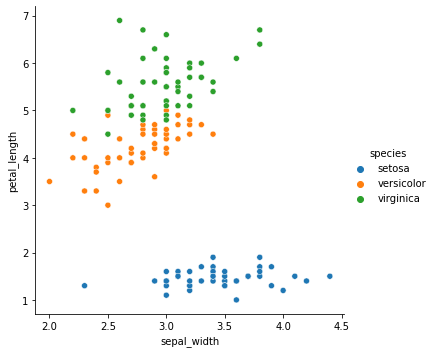

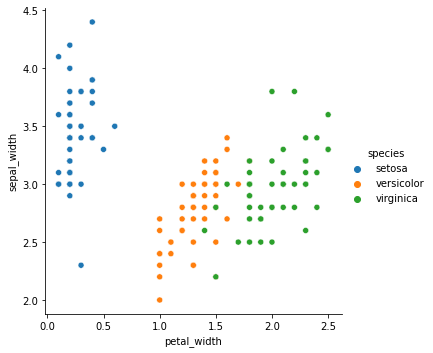

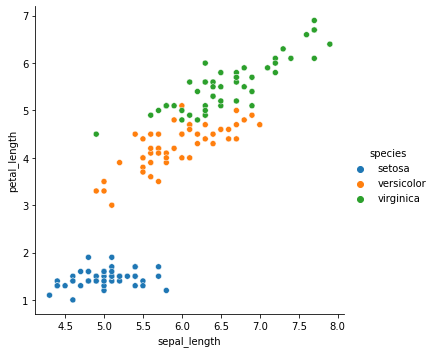

In [11]:
plt.figure(figsize = (10,8))

#plt.subplot(231)
sns.relplot(data = iris, x = 'sepal_width', y = 'sepal_length',
            hue = 'species', kind = 'scatter'
           )

#plt.subplot(232)
sns.relplot(data = iris, x = 'petal_width', y = 'petal_length', hue = 'species', kind = 'scatter'
           )

#plt.subplot(233)
sns.relplot(data = iris, x = 'petal_width', y = 'sepal_length', hue = 'species', kind = 'scatter'
           )

#plt.subplot(234)
sns.relplot(data = iris, x = 'sepal_width', y = 'petal_length', hue = 'species',  kind = 'scatter'
           )

#plt.subplot(235)
sns.relplot(data = iris, x = 'petal_width', y = 'sepal_width', hue = 'species', kind = 'scatter'
           )

#plt.subplot(236)
sns.relplot(data = iris, x = 'sepal_length', y = 'petal_length', hue = 'species', kind = 'scatter'
           )

In [12]:
#Petal length and petal width seem to be the best indicators. 

# Exercises Part 2

### 1. Using the lesson as an example, use seaborn's load_dataset function to load the anscombe data set. Use pandas to group the data by the dataset column, and calculate summary statistics for each dataset. What do you notice? Plot the x and y values from the anscombe data. Each dataset should be in a separate column.

In [13]:
ans = sns.load_dataset('anscombe')

ans.T

,0,1,2,3,4,5,6,7,8,9,...,34,35,36,37,38,39,40,41,42,43
dataset,I,I,I,I,I,I,I,I,I,I,...,IV,IV,IV,IV,IV,IV,IV,IV,IV,IV
x,10.0,8.0,13.0,9.0,11.0,14.0,6.0,4.0,12.0,7.0,...,8.0,8.0,8.0,8.0,8.0,8.0,19.0,8.0,8.0,8.0
y,8.04,6.95,7.58,8.81,8.33,9.96,7.24,4.26,10.84,4.82,...,5.76,7.71,8.84,8.47,7.04,5.25,12.5,5.56,7.91,6.89


In [14]:
ans.groupby('dataset')[['x', 'y']].agg(['sum', 'mean', 'std'])

x                     y                    
          sum mean       std    sum      mean       std
dataset                                                
I        99.0  9.0  3.316625  82.51  7.500909  2.031568
II       99.0  9.0  3.316625  82.51  7.500909  2.031657
III      99.0  9.0  3.316625  82.50  7.500000  2.030424
IV       99.0  9.0  3.316625  82.51  7.500909  2.030579

In [15]:
ans.groupby('dataset').describe()

x                                               y            \
        count mean       std  min  25%  50%   75%   max count      mean   
dataset                                                                   
I        11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
II       11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
III      11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500000   
IV       11.0  9.0  3.316625  8.0  8.0  8.0   8.0  19.0  11.0  7.500909   

                                                   
              std   min    25%   50%   75%    max  
dataset                                            
I        2.031568  4.26  6.315  7.58  8.57  10.84  
II       2.031657  3.10  6.695  8.14  8.95   9.26  
III      2.030424  5.39  6.250  7.11  7.98  12.74  
IV       2.030579  5.25  6.170  7.04  8.19  12.50

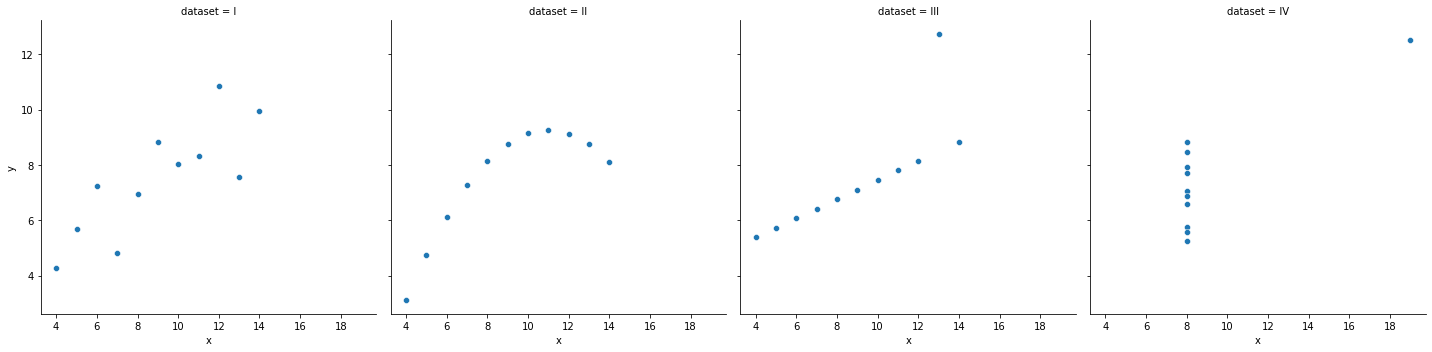

In [16]:
sns.relplot(data = ans, x = 'x', y = 'y', col = 'dataset')

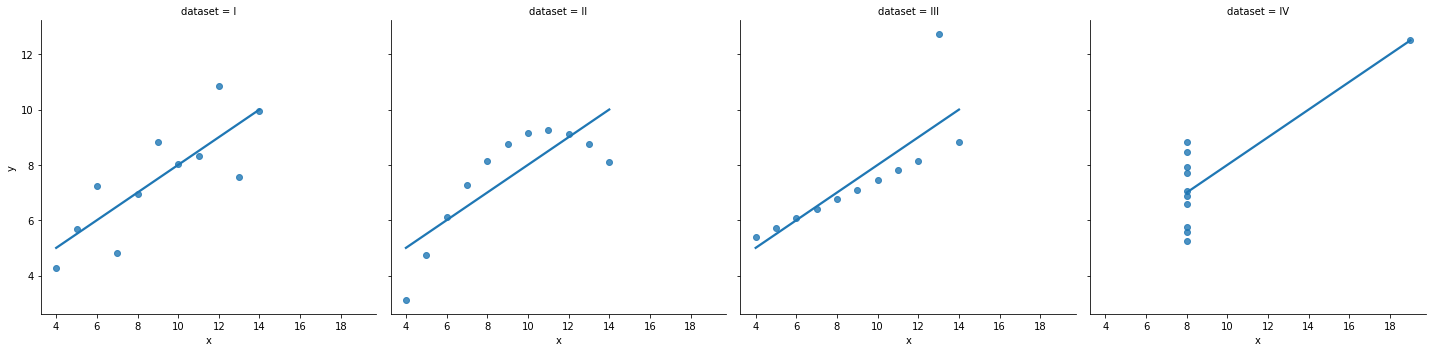

In [17]:
#outliers and their impact
sns.lmplot(data = ans, x = 'x', y = 'y', col = 'dataset', ci = 0)

#Note: 'lmplot' is a linear model plot, where we're visualizing regression lines

#The third and fourth charts really show the impact of outliers on a regression line, so we'll want to be sure that we consider whether such outliers should be included in the analysis. 

### 2. Load the InsectSprays dataset and read its documentation. Create a boxplot that shows the effectiveness of the different insect sprays.

In [18]:
#I need to go through and look more at how to import datasets from respective places. 
insect_spray = pds.data('InsectSprays')

insect_spray

,count,spray
1,10,A
2,7,A
3,20,A
4,14,A
5,14,A
6,12,A
7,10,A
8,23,A
9,17,A
10,20,A


<AxesSubplot:xlabel='spray', ylabel='count'>

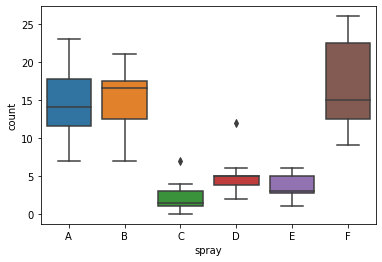

In [19]:
sns.boxplot(data = insect_spray, x = 'spray', y = 'count')

### 3. Load the swiss dataset and read its documentation. The swiss dataset is available from pydatset rather than seaborn. Create visualizations to answer the following questions:

In [20]:
swiss = pds.data('swiss')

swiss

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality
Courtelary,80.2,17.0,15,12,9.96,22.2
Delemont,83.1,45.1,6,9,84.84,22.2
Franches-Mnt,92.5,39.7,5,5,93.40,20.2
Moutier,85.8,36.5,12,7,33.77,20.3
Neuveville,76.9,43.5,17,15,5.16,20.6
Porrentruy,76.1,35.3,9,7,90.57,26.6
Broye,83.8,70.2,16,7,92.85,23.6
Glane,92.4,67.8,14,8,97.16,24.9
Gruyere,82.4,53.3,12,7,97.67,21.0
Sarine,82.9,45.2,16,13,91.38,24.4


#### a. Create an attribute named is_catholic that holds a boolean value of whether or not the province is Catholic. (Choose a cutoff point for what constitutes catholic)

In [21]:
swiss['is_catholic'] = (swiss.Catholic > 50.00)

#### b. Does whether or not a province is Catholic influence fertility?

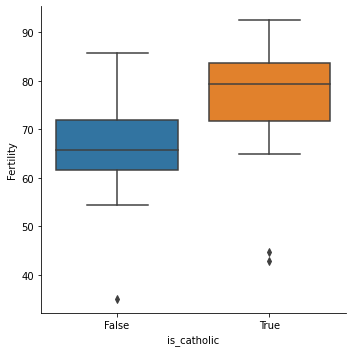

In [22]:
sns.catplot(data = swiss, x = 'is_catholic', y = 'Fertility', kind = 'box')

#Whether or not a province is Catholic does seem to have a small effect on fertility. 

#### c. What measure correlates most strongly with fertility?

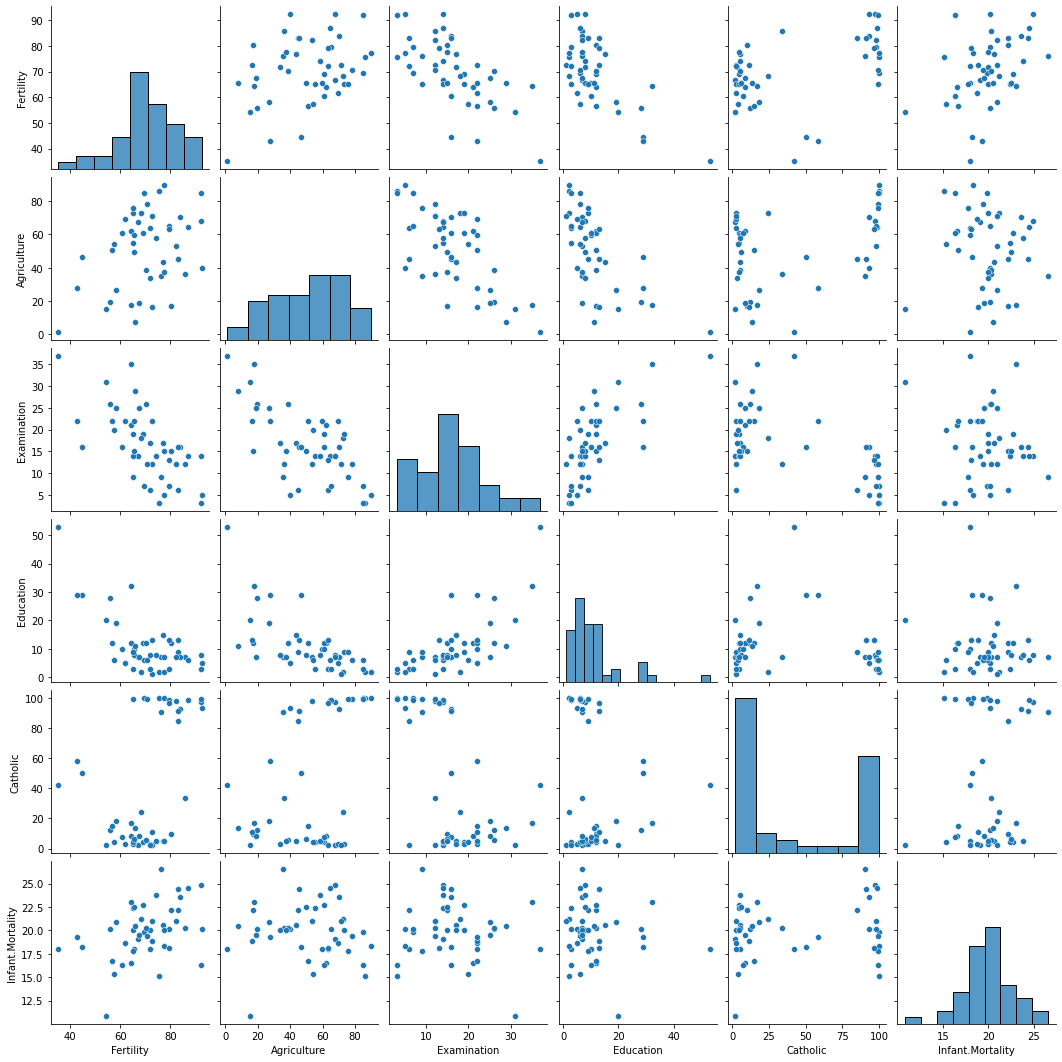

In [23]:
#COME BACK AND LOOK AT HOW ILOC WORKS

sns.pairplot(data = swiss.iloc[:, :-1])

#The measure most strongly correlated (negatively) with fertility seems to be education.

### 4. Using the chipotle dataset from the previous exercise, create a bar chart that shows the 4 most popular items and the revenue produced by each.

In [24]:
url = get_db_url('chipotle')

chipotle = pd.read_sql('SELECT * FROM orders', url)

In [25]:
chipotle['item_price'] = chipotle.item_price.str.replace('$', '').astype(float)

/var/folders/dk/lzs3plw14ms00nxw2vwq68vc0000gn/T/ipykernel_21482/1551574539.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  chipotle['item_price'] = chipotle.item_price.str.replace('$', '').astype(float)


In [26]:
chipotle

,id,order_id,quantity,item_name,choice_description,item_price
0,1,1,1,Chips and Fresh Tomato Salsa,nan,2.39
1,2,1,1,Izze,[Clementine],3.39
2,3,1,1,Nantucket Nectar,[Apple],3.39
3,4,1,1,Chips and Tomatillo-Green Chili Salsa,nan,2.39
4,5,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans, Rice, Cheese, Sour Cream]]",16.98
...,...,...,...,...,...,...
4617,4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour Cream, Cheese, Lettuce, Guacamole]]",11.75
4618,4619,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese, Lettuce, Guacamole]]",11.75
4619,4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto Beans, Guacamole, Lettuce]]",11.25
4620,4621,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettuce]]",8.75


item price - includes quantity
item name
create series where index is item name (via groupby) - 'top 4'
orders.groupby(item_name)
item_price.sum()
nlargest and top 4
y-axis (revenue) 
top_4(Values)
x = top_4.index

In [27]:
most_popular = pd.read_sql('''
                                SELECT item_name, 
                                SUM(quantity) AS quantity,
                                SUM(CAST(REPLACE(item_price, '$', '') AS FLOAT)) AS revenue
                                FROM orders
                                GROUP BY item_name
                                ORDER BY quantity DESC
                                LIMIT 4;''', url)

most_popular

,item_name,quantity,revenue
0,Chicken Bowl,761.0,7342.73
1,Chicken Burrito,591.0,5575.82
2,Chips and Guacamole,506.0,2201.04
3,Steak Burrito,386.0,3851.43


<AxesSubplot:xlabel='item_name', ylabel='revenue'>

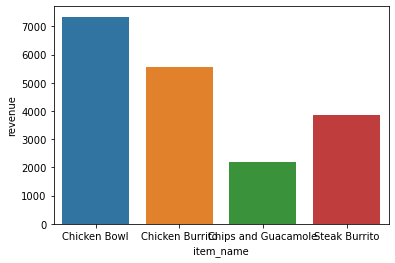

In [28]:
sns.barplot(y = 'revenue',
            x = 'item_name',
            data = most_popular)

### 5. Load the sleepstudy data and read its documentation. Use seaborn to create a line chart of all the individual subject's reaction times and a more prominant line showing the average change in reaction time.

In [29]:
sleepstudy = pds.data('sleepstudy')

sleepstudy

,Reaction,Days,Subject
1,249.5600,0,308
2,258.7047,1,308
3,250.8006,2,308
4,321.4398,3,308
5,356.8519,4,308
...,...,...,...
176,329.6076,5,372
177,334.4818,6,372
178,343.2199,7,372
179,369.1417,8,372


<AxesSubplot:xlabel='Days', ylabel='Reaction'>

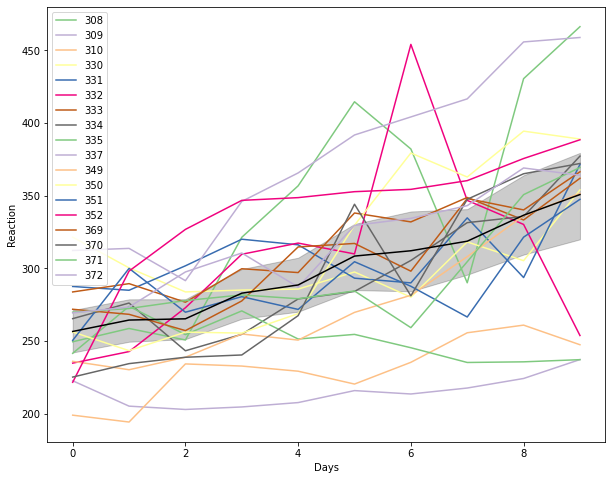

In [45]:
plt.figure(figsize=(10, 8))

sns.lineplot(data = sleepstudy, x = 'Days', y = 'Reaction', hue = 'Subject', palette = 'Accent')
sns.lineplot(data = sleepstudy, x = 'Days', y = 'Reaction', color = 'black')